#### import neccesary basic packages

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

#### define a function for informative spacer between succesive screen outputs

In [77]:
# optical separation of print outputs
def spacer(string=""):
    spacer_inlay = 7*"\*/*"
    spacer_string = spacer_inlay + "  [" + string + "]  " + spacer_inlay
    print("\n" + len(spacer_string)*"_" + "\n" + spacer_string + "\n")

#### load geographical data and adjust coordinate reference system

In [78]:
# load data - https://stekhn.carto.com/tables/munich/public
shapefile = 'data/munich.shp'
gdf = gpd.read_file(shapefile)

# !! TODO
# string format for borough name
gdf.name = gdf.name.str.replace(" ", "").replace(",", "-")

In [79]:
# what type is a gdf?
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [80]:
spacer("gdf head")
print(gdf.head())

spacer("gdf info")
print(gdf.info())

spacer("gdf shape")
print(gdf.shape)

spacer("gdf.name unique")
print(gdf.name.unique())
print(gdf.name.sort_values())


______________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [gdf head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

                  name  munich_ren  munich_r_1  munich_r_2  cartodb_id  \
0           BergamLaim       15.54        81.6          20          15   
1     Schwanthalerhöhe      -99.00        66.0           8           8   
2       Altstadt-Lehel       18.71        84.6          33          12   
3  Allach-Untermenzing       11.90        85.1          12           4   
4               Hadern       14.28        67.3          10           2   

   created_at  updated_at                                           geometry  
0  2015-07-21  2015-07-21  POLYGON ((11.6166043 48.1337163, 11.6179074 48...  
1  2015-07-21  2015-07-21  POLYGON ((11.5350379 48.1303296, 11.5326142 48...  
2  2015-07-21  2015-07-21  POLYGON ((11.5821098 48.133721, 11.5805171 48....  
3  2015-07-21  2015-07-21  POLYGON ((11.4597967 48.2117073, 11.460079 48....  
4  2015-07-21  2

In [81]:
# reproject to new coordinate reference system: mercator
gdf = gdf.to_crs({'init':'epsg:3395'})

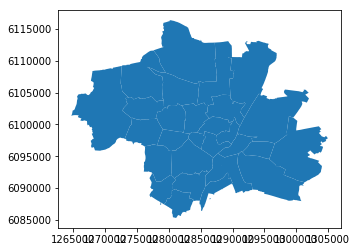

In [82]:
gdf.plot()

#### load numerical data

In [83]:
# source:
# https://www.opengov-muenchen.de/dataset/indikatorenatlas-bevoelkerung-religionszugehoerigkeit

religion_file = "./data/munich_religion.csv"
religion = pd.read_csv(religion_file)

#### analyse data

In [84]:
spacer("head")
print(religion.head())

spacer("shape")
print(religion.shape)

spacer("info")
print(religion.info())


__________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

                Indikator   Ausprägung  Jahr  \
0  Religionszugehörigkeit  evangelisch  2017   
1  Religionszugehörigkeit  evangelisch  2017   
2  Religionszugehörigkeit  evangelisch  2017   
3  Religionszugehörigkeit  evangelisch  2017   
4  Religionszugehörigkeit  evangelisch  2017   

                Räumliche Gliederung  Indikatorwert  Basiswert 1  Basiswert 2  \
0                      Stadt München           11.4       174692      1526056   
1                01 Altstadt - Lehel           12.6         2631        20926   
2  02 Ludwigsvorstadt - Isarvorstadt           11.7         6033        51632   
3                     03 Maxvorstadt           13.7         7004        51311   
4                04 Schwabing - West           14.0         9555        68265   

   Basiswert 3  Basiswert 4  Basiswert 5  \
0          NaN          NaN          NaN   


In [85]:
spacer("dtypes")
print(religion.dtypes)

spacer("unique 'Indikator'")
print(religion.Indikator.unique())

spacer("unique 'Ausprägung'")
print(religion.Ausprägung.unique())

spacer("unique 'Räumliche Gliederung'")
print(religion["Räumliche Gliederung"].unique())

spacer("unique 'Name Basiswert 1'")
print(religion["Name Basiswert 1"].unique())

spacer("unique 'Name Basiswert 2'")
print(religion["Name Basiswert 2"].unique())

spacer("val_count 'Jahr'")
print(religion.Jahr.value_counts())


____________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [dtypes]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

Indikator                object
Ausprägung               object
Jahr                      int64
Räumliche Gliederung     object
Indikatorwert           float64
Basiswert 1               int64
Basiswert 2               int64
Basiswert 3             float64
Basiswert 4             float64
Basiswert 5             float64
Name Basiswert 1         object
Name Basiswert 2         object
Name Basiswert 3        float64
Name Basiswert 4        float64
Name Basiswert 5        float64
dtype: object

________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique 'Indikator']  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

['Religionszugehörigkeit']

_________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique 'Ausprägung']  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

['evangel

In [86]:
spacer("unique - 'Basiswert' 1")
print(religion["Basiswert 1"].unique())

spacer("unique - 'Basiswert' 2")
print(religion["Basiswert 2"].unique())

spacer("unique - 'Basiswert' 3")
print(religion["Basiswert 3"].unique())

spacer("unique - 'Basiswert' 4")
print(religion["Basiswert 4"].unique())

spacer("unique - 'Basiswert' 5")
print(religion["Basiswert 5"].unique())


____________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique - 'Basiswert' 1]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

[174692   2631   6033 ...   8947  20426  19149]

____________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique - 'Basiswert' 2]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

[1526056   20926   51632   51311   68265   60937   40682   59386   29535
   98520   53662   74731   76341   85971   45582   72006  114478   53937
   52600   95554   49626   74098   46385   32677   60933   56281 1542860
   21454   54915   53443   69407   61999   41230   59174   30282   99538
   53859   76255   77188   87164   45655   71448  113898   54784   54050
   96200   50567   74432   45571   32248   61764   56335 1521678   21122
   54049   53743   68527   61495   40879   58398   30381   98702   53261
   75488   75020   85947   45035   69830  112371   54402   53377   93602
   50257   73320   43682

#### clean data

In [87]:
# specify columns to drop
spacer("all columns")
print(religion.columns)

cols_to_drop = religion.columns[[0,4,7,8,9,10,11,12,13,14]]

spacer("columns to drop")
print(cols_to_drop)


_________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [all columns]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

Index(['Indikator', 'Ausprägung', 'Jahr', 'Räumliche Gliederung',
       'Indikatorwert', 'Basiswert 1', 'Basiswert 2', 'Basiswert 3',
       'Basiswert 4', 'Basiswert 5', 'Name Basiswert 1', 'Name Basiswert 2',
       'Name Basiswert 3', 'Name Basiswert 4', 'Name Basiswert 5'],
      dtype='object')

_____________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [columns to drop]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

Index(['Indikator', 'Indikatorwert', 'Basiswert 3', 'Basiswert 4',
       'Basiswert 5', 'Name Basiswert 1', 'Name Basiswert 2',
       'Name Basiswert 3', 'Name Basiswert 4', 'Name Basiswert 5'],
      dtype='object')


In [90]:
# drop unneccesary columns
religion_clean = religion.drop(cols_to_drop, axis=1)

# rename columns
columns_old = religion_clean.columns
columns_new = ['religion', 'year', 'district', 'num_rel', 'num_total']
religion_clean.rename(columns=dict(zip(columns_old, columns_new)), inplace=True)

# simplify values in religion
religion_clean.religion = religion_clean.religion.map(
    dict(zip(religion_clean.religion.unique(), ['ev', 'rk', 'other'])))

# !! TODO
# parse numbers
district_numbers = pd.Series(religion_clean.district.unique()).map(lambda x:{x.split(" ", 1)[0] if x.split()[0].isdigit() else "00"})
district_numbers = [x.pop() for x in district_numbers]
# parse names
district_names = pd.Series(religion_clean.district.unique()).map(lambda x:{x.split(" ", 1)[1] if x.split()[0].isdigit() else "Stadt München"})
district_names = [x.pop().replace(" ", "") for x in district_names]

# create district data frame: df_districts - three columns: number, name, string
df_districts = pd.DataFrame({'number':district_numbers, 'name':district_names, 'string':religion_clean.district.unique()})

spacer("df_district head")
print(df_districts.head())

spacer("df_district shape")
print(df_districts.shape)

religion_clean.district = religion_clean.district.map(dict(zip(df_districts.string, df_districts.number)))
religion_clean.district = religion_clean.district.astype(np.int64)

spacer("religion_clean head")
print(religion_clean.head())


______________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [df_district head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

  number                          name                             string
0     00                  StadtMünchen                      Stadt München
1     01                Altstadt-Lehel                01 Altstadt - Lehel
2     02  Ludwigsvorstadt-Isarvorstadt  02 Ludwigsvorstadt - Isarvorstadt
3     03                   Maxvorstadt                     03 Maxvorstadt
4     04                Schwabing-West                04 Schwabing - West

_______________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [df_district shape]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

(26, 3)

_________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [religion_clean head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

  religion  year  district  num_rel  num_total
0       ev  2

In [91]:
# pivoting yields mulitiindex: year, district
religion_piv = religion_clean.pivot_table(index=['year','district'], columns='religion', values='num_rel', aggfunc='sum')

# !! TODO
# noramlize values
sum_series = 100/religion_piv.sum(axis=1)
religion_pivnorm = religion_piv.T.multiply(sum_series).T

# reorder religions
religion_final = religion_pivnorm.loc[:,['rk', 'ev', 'other']]

spacer("religion_final head")
print(religion_final.head())


_________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [religion_final head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

religion              rk         ev      other
year district                                 
2000 0         43.336266  15.274846  41.388888
     1         40.965495  16.229455  42.805051
     2         38.437830  13.603743  47.958426
     3         39.177012  16.900733  43.922255
     4         38.498578  17.713659  43.787763


In [92]:
# export "munich_districts.csv"
df_districts.drop('string', axis=1).to_csv('./data/munich_districts.csv')

#### check year 2017 seperately

-> check pandas youtube video - chapter 14 

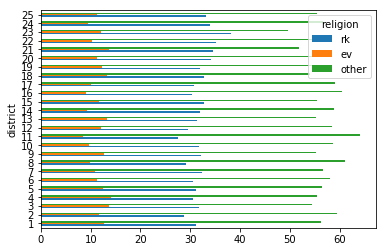

In [93]:
religion_2017 = religion_final.loc[2017]
religion_2017.drop(0, axis=0).plot(kind='barh', stacked=False, sort_columns=False)
#religion_2017.drop(0, axis=0).plot(kind='barh')

#### export plots for each district

In [167]:
import os

# check whether directory exists
dirName = "./data/plots"
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("directory " , dirName ,  " created ")
else:    
    print("directory " , dirName ,  " already exists")

# create plots
for district_number in range(0,26):    
    categories = ['evangelisch', 'andere', 'römisch-katholisch']
    values = religion_2017.loc[district_number]
    
    plt.bar(categories, values)

    plt.xlabel('Religionen')
    plt.ylabel('Anteil')
    plt.title('Anteil der Religionen in ' + df_districts.loc[district_number,'name'])

    plt.tight_layout()
    plt.savefig('./data/plots/munich_religions_in_' + str(district_number) + '.png')
    plt.close()

directory  ./data/plots  already exists


#### add district_number to geographical data

In [117]:
spacer("type(gdf)")
print(type(gdf))

# compare names of districts >>> division of gdf is finer
spacer("compare names of districts - gdf")
print(gdf.name.sort_values())
print(len(gdf.name))

spacer("compare names of districts - df_districts")
print(df_districts.name.sort_values())
print(len(df_districts.name))


_______________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [type(gdf)]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

<class 'geopandas.geodataframe.GeoDataFrame'>

______________________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [compare names of districts - gdf]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

3              Allach-Untermenzing
2                   Altstadt-Lehel
5                    Au-Haidhausen
17      Aubing-Lochhausen-Langwied
0                       BergamLaim
18                     Bogenhausen
16          Feldmoching-Hasenbergl
27         Forstenried-Fürstenried
25                        Freimann
24                         Giesing
4                           Hadern
23                      Harlaching
13                            Laim
8     Ludwigsvorstadt-Isarvorstadt
9                      Maxvorstadt
14            Milbertshofen-AmHart
11                         Moosach
7                    

In [118]:
print(df_districts)
print("* "+df_districts.name[19])

   number                                               name  \
0      00                                       StadtMünchen   
1      01                                     Altstadt-Lehel   
2      02                       Ludwigsvorstadt-Isarvorstadt   
3      03                                        Maxvorstadt   
4      04                                     Schwabing-West   
5      05                                      Au-Haidhausen   
6      06                                           Sendling   
7      07                                  Sendling-Westpark   
8      08                                   Schwanthalerhöhe   
9      09                              Neuhausen-Nymphenburg   
10     10                                            Moosach   
11     11                               Milbertshofen-AmHart   
12     12                                 Schwabing-Freimann   
13     13                                        Bogenhausen   
14     14                               

In [119]:
# def district_number column in gdf >>> in order to merge with numerical data
gdf['district_number'] = np.nan
for gdf_name in gdf.name:
    for district_name in df_districts.name:
        if gdf_name in district_name:
            distr_number = df_districts.loc[df_districts.name == district_name, 'number'].values[0]
            gdf.loc[gdf.name == gdf_name, 'district_number'] = distr_number

In [120]:
spacer("gdf.district_number")
print(gdf.district_number.value_counts(dropna=False))

spacer("consider missing values")
print(gdf.loc[gdf.district_number.isnull()])


_________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [gdf.district_number]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

NaN    3
21     2
19     2
09     2
25     1
10     1
01     1
03     1
02     1
13     1
12     1
07     1
14     1
15     1
16     1
05     1
11     1
18     1
24     1
08     1
23     1
22     1
20     1
Name: district_number, dtype: int64

_____________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [consider missing values]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

                        name  munich_ren  munich_r_1  munich_r_2  cartodb_id  \
10   Schwabing-SchwabingWest       15.47        91.3          66          21   
24                   Giesing       15.54        91.3          23          25   
26  Thalkirchen,Obersendling       13.77        84.5          15          26   

    created_at  updated_at                                           geometry  \
10  2015-07-21 

In [121]:
# manually setting district numbers
gdf.loc[10,'district_number'] = "04" # Schwabing - West
gdf.loc[24,'district_number'] = "18" # Untergiesing - Harlaching
gdf.loc[26,'district_number'] = "19" # Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln

gdf.district_number = gdf.district_number.astype(int)

#### merge geographical and numerical data

In [122]:
# merge dataframes gdf and religion_2017
df_merged = gdf.merge(religion_2017.drop(0, axis=0), left_on='district_number', right_on='district')

In [158]:
# whats wrong witch harlaching
print(df_merged.loc[25,'geometry'])

POLYGON ((1286534.038138698 6091025.810185918, 1286740.157307851 6090986.426744213, 1286893.811600993 6090972.119134034, 1287046.241379736 6090974.046754908, 1287256.969175808 6091004.921983332, 1287437.818820551 6091073.186880347, 1287671.623147064 6091163.969408168, 1287942.240829182 6091252.841839769, 1288059.783079511 6091313.364697414, 1288090.529522868 6091372.558530026, 1288324.934974632 6091473.680896984, 1288504.148222859 6091611.415319851, 1288740.624217151 6091857.20901101, 1288844.98623977 6091998.572688743, 1288962.829052724 6092151.024069876, 1289108.679849562 6092309.860279724, 1289253.172548611 6092409.481366879, 1289313.474316774 6092239.557813474, 1289287.303104488 6091412.974095762, 1289619.068582899 6091608.523671703, 1289657.685314256 6091631.291272832, 1289850.457276462 6091158.950835619, 1289983.573123553 6090832.783215077, 1289997.922205916 6090797.638022282, 1289868.613485411 6090728.793746936, 1289821.525340805 6090695.626392751, 1289848.420129781 6090660.1494

In [123]:
# harlaching split twofold -> multipolygon -> just get big part
df_merged.loc[25,'geometry'] = df_merged.loc[25,'geometry'][0]

In [157]:
spacer("df_merged.head()")
print(df_merged)


______________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [df_merged.head()]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

                            name  munich_ren  munich_r_1  munich_r_2  \
0                     BergamLaim       15.54        81.6          20   
1               Schwanthalerhöhe      -99.00        66.0           8   
2                 Altstadt-Lehel       18.71        84.6          33   
3            Allach-Untermenzing       11.90        85.1          12   
4                         Hadern       14.28        67.3          10   
5                  Au-Haidhausen       15.82        83.8          39   
6                    Obermenzing       12.77        79.4          19   
7                         Pasing       13.43        69.5          34   
8                      Neuhausen       15.61        73.8          30   
9                    Nymphenburg       15.62        83.4          25   
10  Ludwigsvorstadt-Isarvorstadt       16.49    

#### create json

In [125]:
import json

# read data to json
merged_json = json.loads(df_merged.to_json())

# convert to str like object
json_data = json.dumps(merged_json)

#### bokeh work flow

In [126]:
# format the tooltip

from bokeh.models import HoverTool
tooltips = """
    <HTML>
        <HEAD>
            <style>
                .bk-tooltip {
                    opacity: .8 !important;
                    }
            </style>
        </HEAD>
        <BODY>
            <div>
                <div>
                    <img
                        src="./data/munich_kindl.png" height="42" alt="@imgs" width="42"
                        style="float: left; margin: 0px 10px 0px 20px;"
                        border="0"
                    ></img>
                </div>
                <div>
                    <span style="font-size: 10px; font-weight: bold;">@name</span>
                </div>
                <div>
                    <img
                        src="./data/plots/munich_religions_in_@district_number.png" height="42" alt="@imgs" width="42"
                        style="float: left; margin: 0px 0px 0px 0px; width: 200px; height: 150px;"
                        border="0"
                    ></img>
                </div>
            </div>
        </BODY>
    </HTML>
"""

hover = HoverTool(
    tooltips = tooltips
)

In [159]:
from bokeh.io import push_notebook, output_notebook, show, save, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.models.widgets import Tabs, Panel
from bokeh.layouts import column, row, gridplot

# input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

# create figure object.
f = figure(title = 'Religionen in München', 
           plot_height = 600 , plot_width = 750, 
           tools=[hover],
           toolbar_location = None)

f.xgrid.grid_line_color = None
f.ygrid.grid_line_color = None
f.xaxis.visible = False
f.yaxis.visible = False

# add patch renderer to figure
p = f.patches('xs','ys', 
          source = geosource,
          fill_color = 'blue', #{'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'blue', line_width = 0.1, fill_alpha = .05, line_alpha=.5,
          hover_fill_color="blue", hover_alpha=0.2, hover_line_color="white"
         )

#Specify figure layout.
#f.add_layout(color_bar, 'below')

# Add the HoverTool to the figure
#f.add_tools(HoverTool(tooltips=tooltips))

#Display figure inline in Jupyter Notebook.
output_notebook()
#output_file('./output.html')

#Display and export figure
target0 = show(f, notebook_handle=True)

#save(f, filename='./output.html')

Loading BokehJS ...

In [109]:
def turnOnAxis():
    f.xaxis.visible = True
    f.yaxis.visible = True
    push_notebook(handle=target)

In [110]:
def turnOffAxis():
    f.xaxis.visible = False
    f.yaxis.visible = False
    push_notebook(handle=target)

#### comparison of all districts for a specific year

In [156]:
#from bokeh.transform import factor_cmap
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource
import time

source = ColumnDataSource(religion_final.loc[2000].drop(0, axis=0))
plot = figure(plot_width=1000,
           plot_height=700,
           x_range = (0,72),
           y_range = (0,26),
           title="Anteile der Religionen in der Bezirken im Jahr " + str(2000),
           toolbar_location=None)

bar1 = plot.hbar(y=dodge('district', +0.25, range=plot.x_range), fill_color='green', height=.25, right='other', legend="andere Religionen", source=source, line_color="white")
bar2 = plot.hbar(y=dodge('district', +0.0, range=plot.x_range), fill_color='blue', height=.25, right='rk', legend="römisch-katholisch", source=source, line_color="white")
bar3 = plot.hbar(y=dodge('district', -0.25, range=plot.x_range), fill_color='red', height=.25, right='ev', legend="evangelisch", source=source, line_color="white")

plot.yaxis.ticker = list(range(1,26))
plot.yaxis.major_label_overrides = dict(zip(range(0,26), df_districts['name'].values))
plot.xaxis.axis_label = 'Prozent'

target = show(plot, notebook_handle=True)

# animation: loop over years
year = 2000
should_run = True
while should_run:
    year +=1 
    if year == 2002: time.sleep(2)
    if year == 2017: should_run = False
        
    plot.title.text = "Anteile der Religionen in der Bezirken im Jahr " + str(year)
    source = ColumnDataSource(religion_final.loc[year].drop(0, axis=0))

    # since all bars have same source, setting the source for bar1 is enough
    bar1.data_source.data = source.data
    
    # push updates to the plot continuously using the handle (intererrupt the notebook kernel to stop)
    push_notebook(handle=target)#
    time.sleep(.5)
    

In [164]:
#from bokeh.transform import factor_cmap
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Button, Dropdown
from bokeh.layouts import row, column, WidgetBox, gridplot, grid
from ipywidgets import interact, IntSlider, Select
import time

# push updates to the plot continuously using the handle (intererrupt the notebook kernel to stop)
def pushNewDistrictsAndYear(district_1, district_2, year):
    plot2.title.text = "Anteile der Religionszugehörigkeit in den Bezirken im Jahr " + str(year)
    #source = ColumnDataSource(religion_final.loc[(year, [district_1, district_2]),:].loc[year].reset_index())
    source = ColumnDataSource(
        pd.concat([
            religion_final.loc[(year, [district_1]),:].loc[year],
            religion_final.copy().loc[(year, [district_2]),:].loc[year]]).reset_index()
    )
    bar21.data_source.data = source.data # since all bars have same source, setting one is enough
    plot2.yaxis.major_label_overrides = dict(zip([0,1], df_districts.loc[[district_1,district_2],'name'].values))
    push_notebook(handle=target2)

# animation
def runAnimation(startYear=2000):
    should_run = True
    year = startYear
    while should_run:
        pushNewDistrictsAndYear(district1, district2, year)
        year +=1
        if year > 2017: should_run = False
        time.sleep(.5)
        
def update (Bezirk1=df_districts.name.values[1], Bezirk2=df_districts.name.values[2], Jahr=2000):
    dis1 = int(df_districts[df_districts.name == Bezirk1].number)
    dis2 = int(df_districts[df_districts.name == Bezirk2].number)
    pushNewDistrictsAndYear(dis1, dis2, Jahr)


district1, district2 = 1, 2

source = ColumnDataSource(religion_final.loc[(2000, [district1, district2]),:].loc[2000].reset_index())
plot2 = figure(plot_width=800,
           plot_height=400,
           x_range = (0,100),
           y_range = (-.5,1.6),
           title="Anteile der Religionszugehörigkeit in den Bezirken im Jahr " + str(2000),
           toolbar_location=None)

bar21 = plot2.hbar(y=dodge('index', +0.25, range=plot.x_range), fill_color='green', height=.25, right='other', legend="andere Religionen", source=source, line_color="white")
bar22 = plot2.hbar(y=dodge('index', +0.0, range=plot.x_range), fill_color='blue', height=.25, right='rk', legend="römisch-katholisch", source=source, line_color="white")
bar23 = plot2.hbar(y=dodge('index', -0.25, range=plot.x_range), fill_color='red', height=.25, right='ev', legend="evangelisch", source=source, line_color="white")

plot2.yaxis.ticker = [0,1]
plot2.yaxis.major_label_overrides = dict(zip([0,1], df_districts.loc[[district1,district2],'name'].values))
plot2.xaxis.axis_label = 'Prozent'
plot2.ygrid.visible = False

def on_value_change(change):
    update(Jahr=change['new'])
    
target2 = show(plot2, notebook_handle=True)
inter = interact(update, Jahr=(2000,2017), Bezirk1=df_districts.name.values, Bezirk2=df_districts.name.values)

interactive(children=(Dropdown(description='Bezirk1', index=1, options=('StadtMünchen', 'Altstadt-Lehel', 'Lud…